In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import codecs
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

load_dotenv()

True

# Part A

## MNIST

In [6]:
path_to_data = os.environ.get("MNIST_DATAPATH")
mnist_files = os.listdir(path_to_data)
mnist_files = [x for x in mnist_files if x.endswith("ubyte")]


def convert_to_int(byte):
    integer = int(codecs.encode(byte, 'hex'), 16)
    return integer


dataset = {}
for file in mnist_files:
    print("Reading", file)
    with open(path_to_data + file, "rb") as f:
        data = f.read()
        type_of_data = convert_to_int(data[:4])
        length = convert_to_int(data[4:8])
        if type_of_data == 2051:
            category = "images"
            number_of_rows = convert_to_int(data[8:12])
            number_of_columns = convert_to_int(data[12:16])
            parsed = np.frombuffer(data, dtype=np.uint8, offset=16)
            parsed = parsed.reshape(length, number_of_rows, number_of_columns)
        if type_of_data == 2049:
            category = "labels"
            parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
            parsed = parsed.reshape(length)
        if length == 60000:
            set = "train"
        if length == 10000:
            set = "test"
        dataset[set + '_' + category] = parsed

print(dataset["train_images"][0, :, :])

train_images = dataset['train_images']
train_labels = dataset['train_labels']
train_images_flattened = train_images.reshape(60000, -1)
train_images_flattened = train_images_flattened / 255

test_images = dataset['train_images']
test_images = dataset['train_labels']
test_images_flattened = test_images.reshape(10000, -1)
test_images_flattened = test_images_flattened / 255

indexes = np.random.choice(60000, size=5000, replace=False)
train_images = train_images_flattened[indexes]
train_labels = train_labels[indexes]

Reading t10k-images-idx3-ubyte
Reading t10k-labels-idx1-ubyte
Reading train-images-idx3-ubyte
Reading train-labels-idx1-ubyte
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 2

In [6]:
pca = PCA(n_components=50, random_state=42)
mnist_images_pca = pca.fit_transform(train_images)

In [14]:
perplexities = [5, 20, 30, 50, 100]
tsne_results = {}
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=97)
    tsne_results[perplexity] = tsne.fit_transform(mnist_images_pca)

/var/folders/9d/hd3srjbx4rgbbrvnwxmcmh9c0000gn/T/ipykernel_39236/328526338.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


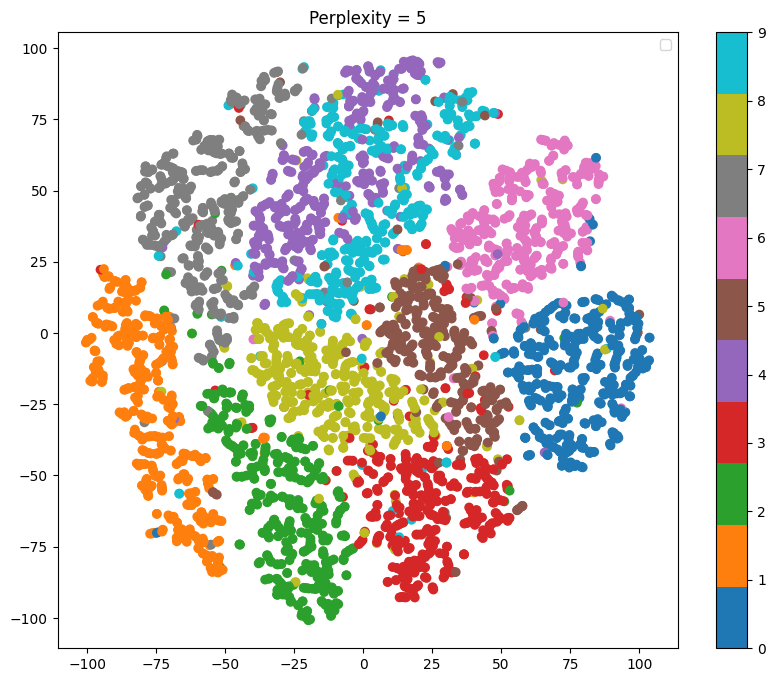

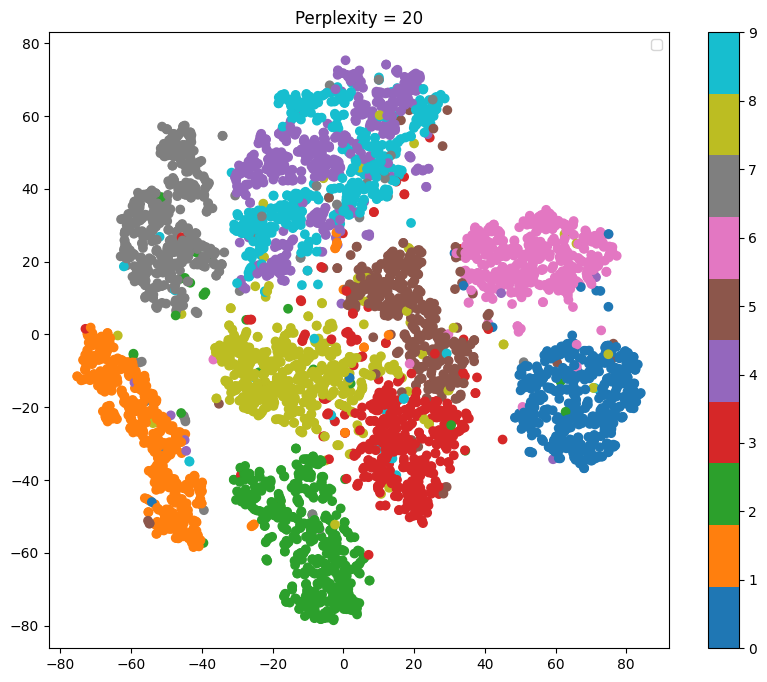

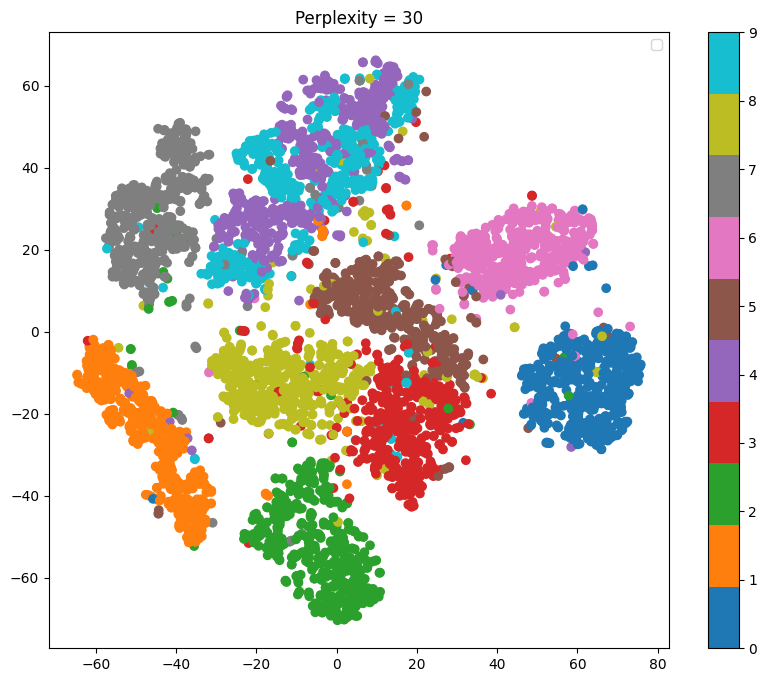

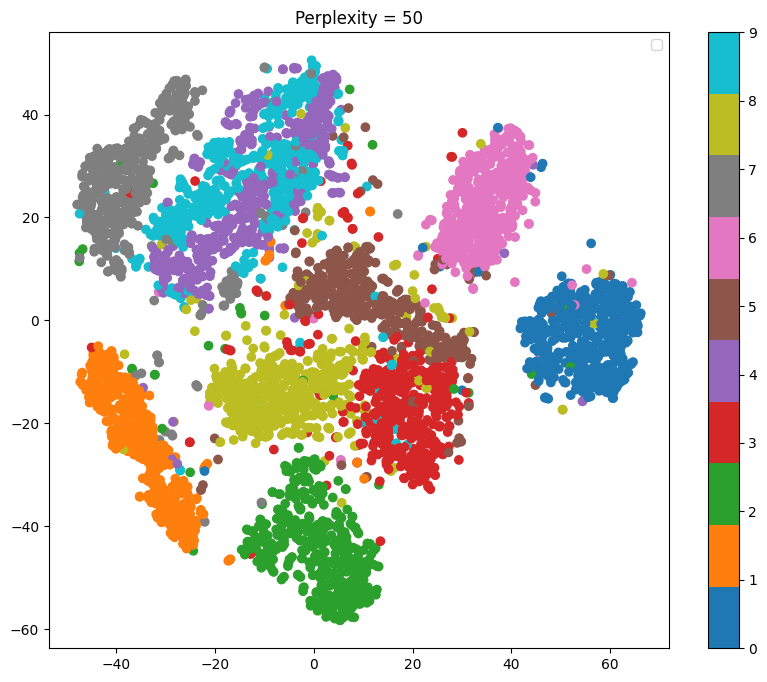

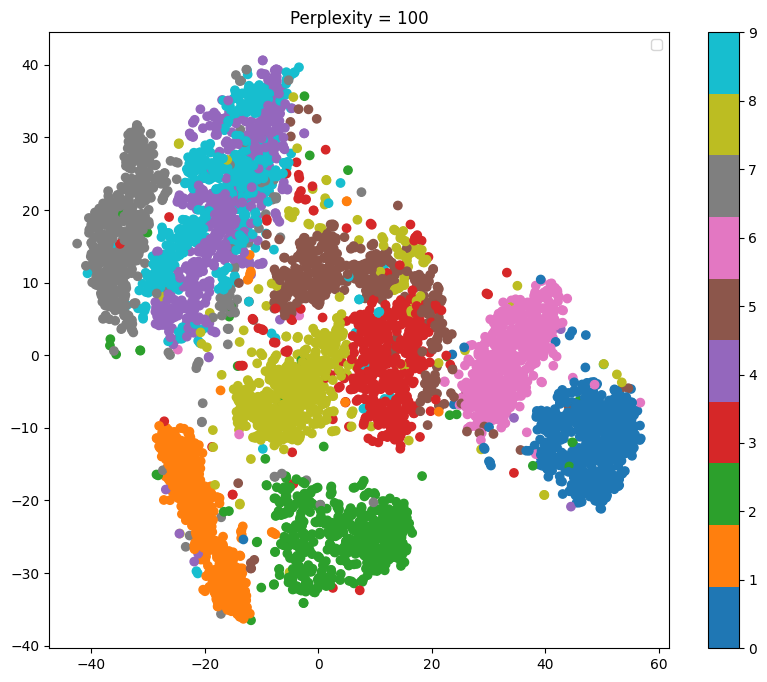

In [20]:
# figure, axes = plt.subplots(1, 3, figsize=(15,5))

for i, perplexity in enumerate(perplexities):
    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_results[perplexity][:, 0], tsne_results[perplexity][:, 1], c=train_labels, cmap='tab10')
    plt.title(f"Perplexity = {perplexity}")
    plt.legend()
    plt.colorbar()
    plt.show()

## 20NG

In [11]:
from numpy import vectorize


categories = ["alt.atheism", "sci.med", "sci.electronics", "comp.graphics", "talk.politics.guns", "sci.crypt"]
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
data = newsgroups.data
labels = newsgroups.target

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data)
vectors = vectors.toarray()
print(vectors.shape)

(3390, 49878)


In [12]:
pca_20ng = PCA(n_components=300, random_state=97)
data_20ng_pca = pca_20ng.fit_transform(vectors)

/var/folders/9d/hd3srjbx4rgbbrvnwxmcmh9c0000gn/T/ipykernel_39236/1404683261.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


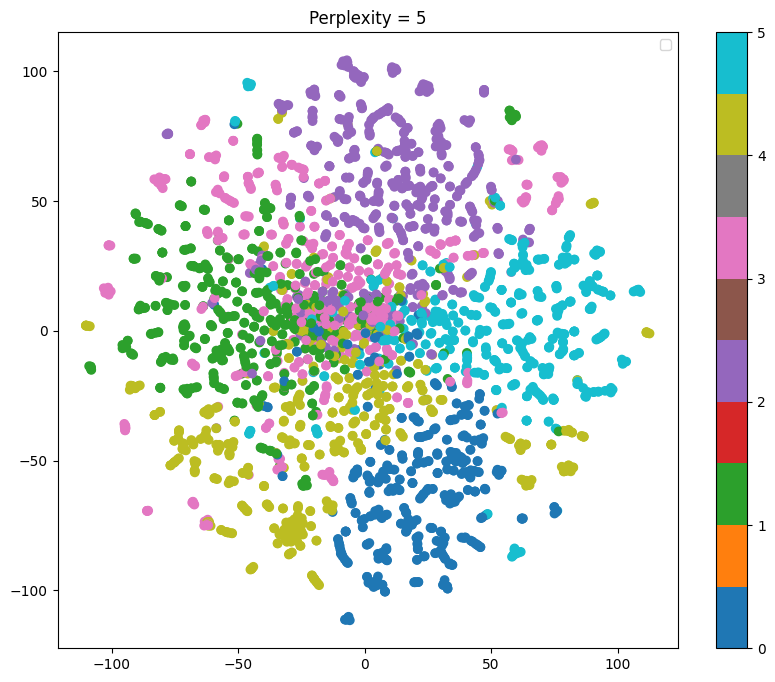

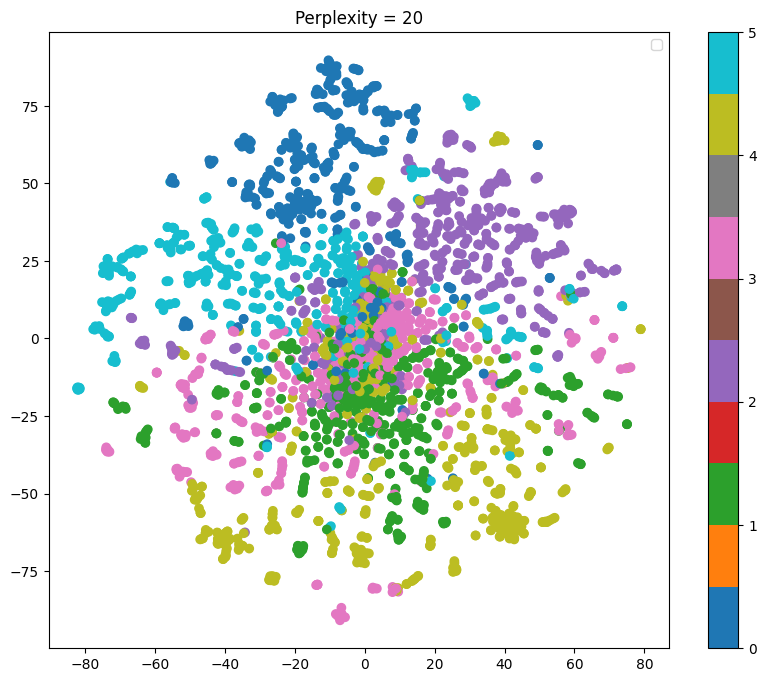

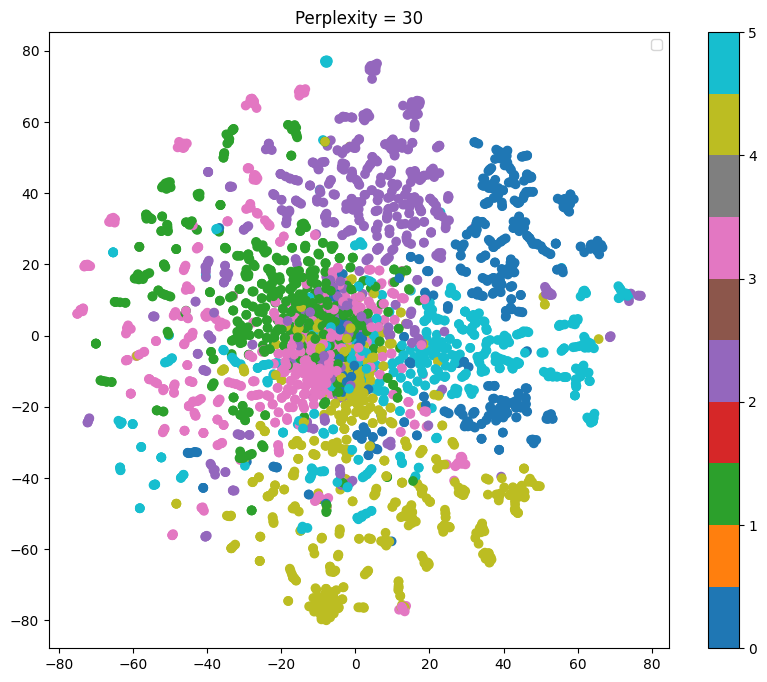

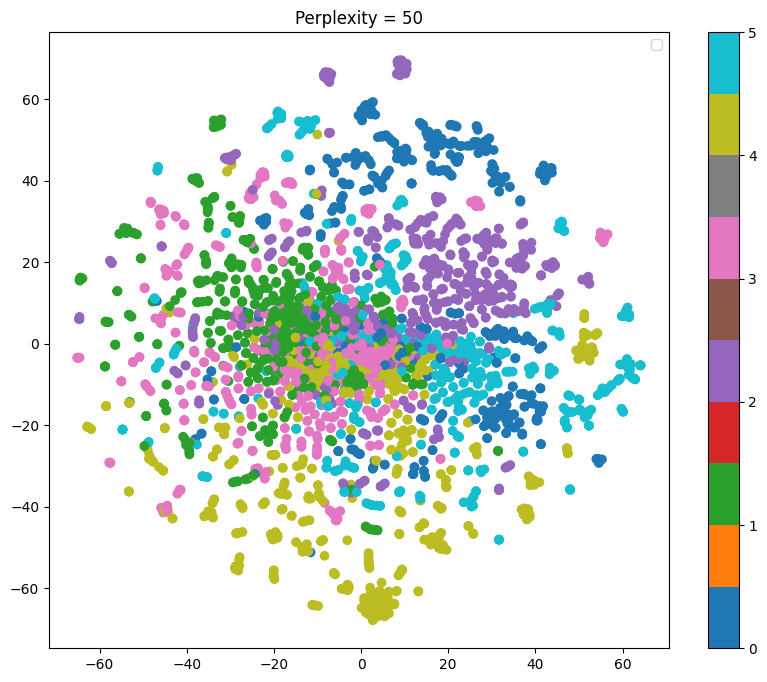

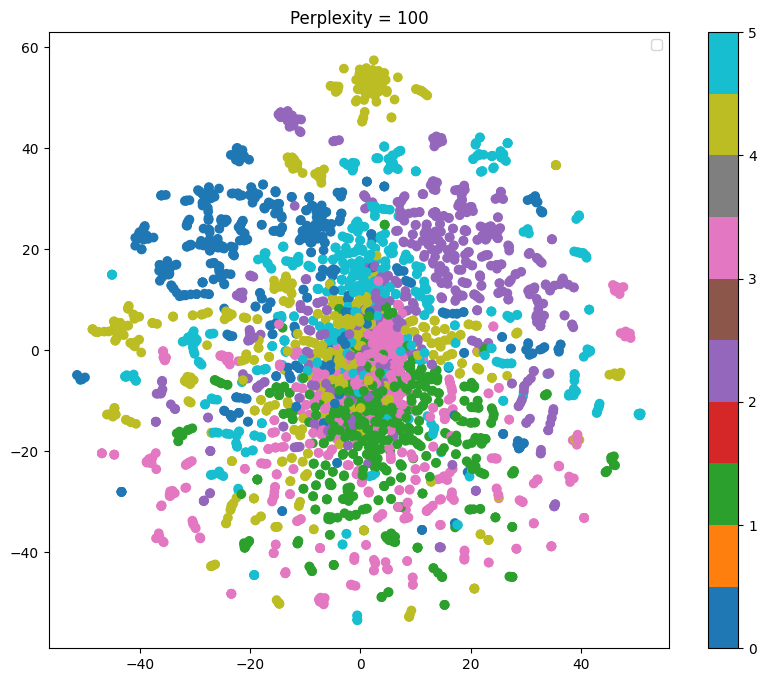

In [21]:
tsne_results_20ng = {}
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=97)
    tsne_results_20ng[perplexity] = tsne.fit_transform(data_20ng_pca)

# figure, axes = plt.subplots(1, 3, figsize=(15,5))
for i, perplexity in enumerate(perplexities):
    plt.figure(figsize=(10, 8))
    plt.scatter(tsne_results_20ng[perplexity][:, 0], tsne_results_20ng[perplexity][:, 1], c=labels, cmap='tab10')
    plt.title(f"Perplexity = {perplexity}")
    plt.legend()
    plt.colorbar()
    plt.show()

# Part B

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [8]:
train_images = dataset['train_images']
train_labels = dataset['train_labels']
train_images_flattened = train_images.reshape(60000, -1)
train_images_flattened = train_images_flattened / 255

indexes = np.random.choice(60000, size=10000, replace=False)
mnist_images = train_images_flattened[indexes]
mnist_labels = train_labels[indexes]

In [16]:
from sklearn.cluster import DBSCAN


def purity_score(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(conf_matrix, axis=0)) / np.sum(conf_matrix)


try:
    dbscan_orig = DBSCAN(eps=3, min_samples=45).fit(mnist_images)
    purity_784d = purity_score(mnist_labels, dbscan_orig.labels_)
    print(f"Purity for 784D data: {purity_784d:.4f}")
except:
    print("DBSCAN failed on original 784D MNIST data due to high dimensionality.")


def apply_dbscan(data, labels, title):
    dbscan = DBSCAN(eps=3, min_samples=45).fit(data)
    purity = purity_score(labels, dbscan.labels_)
    print(f"Purity for {title}: {purity:.4f}")
    return dbscan.labels_


def plot_dbscan(data, labels, title):
    unique_labels = np.unique(labels)
    colours = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    if data.shape[1] == 2:
        plt.figure(figsize=(10, 8))
        for label in unique_labels:
            plt.scatter(data[labels == label, 0], data[labels == label, 1], color=colours[label], label=f"Cluster - {label}")
        plt.title(title)
        plt.legend(loc='upper right', fontsize="small", markerscale=5)
        plt.show()

    elif data.shape[1] == 3:
        plt.figure(figsize=(10, 8))
        ax = plt.axes(projection='3d')
        for label in unique_labels:
            sub = data[labels == label]
            ax.scatter(sub[:, 0], sub[:, 1], sub[:, 2], color=colours[label], label=f"Cluster - {label}")
        ax.set_title(title)
        ax.legend(loc='upper right', fontsize="small", markerscale=5)
        plt.show()


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
    plt.xlabel("Cluster IDs")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

Purity for 784D data: 0.1755


PCA for Dimension = 2
Purity for PCA 2D: 0.1138


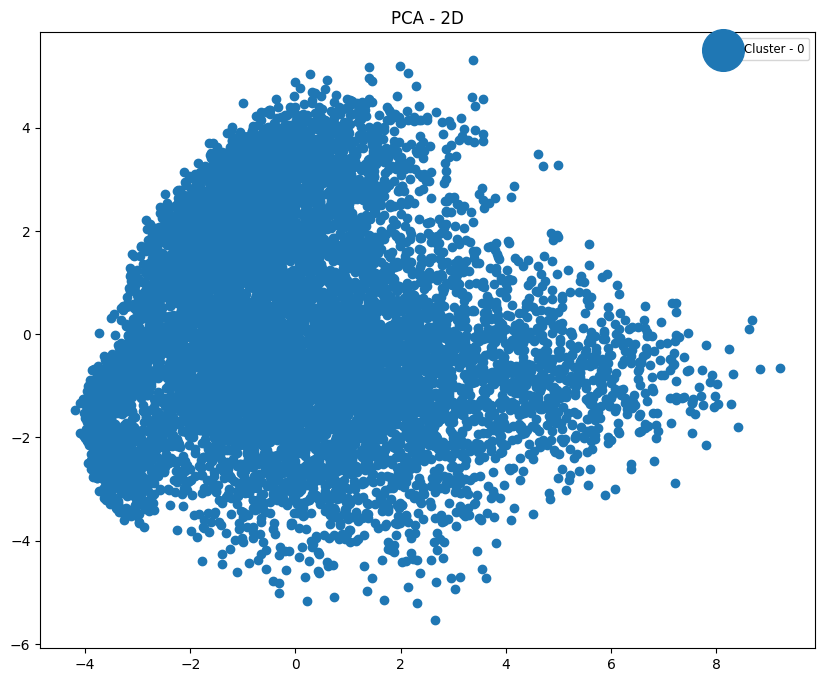

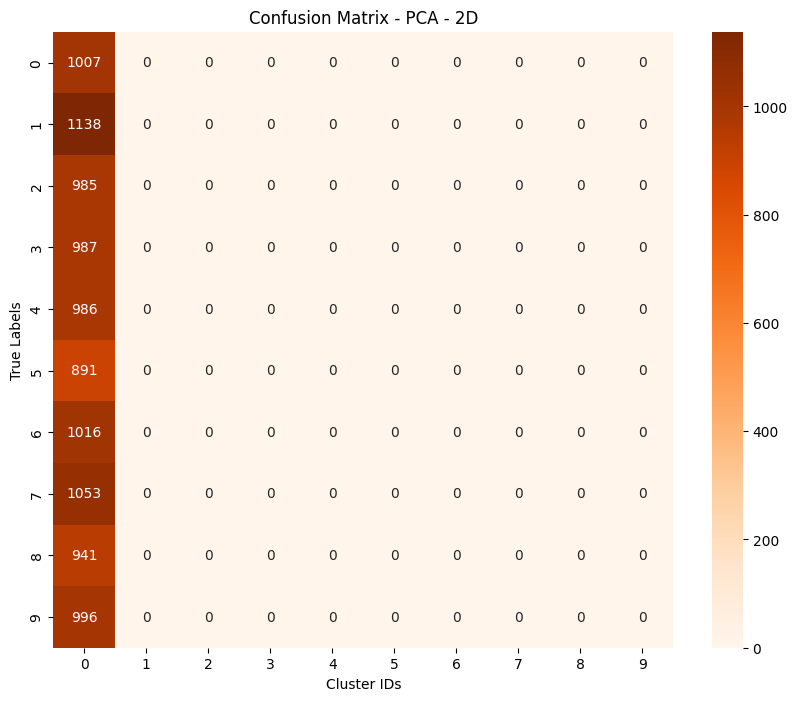

PCA for Dimension = 3
Purity for PCA 3D: 0.1138


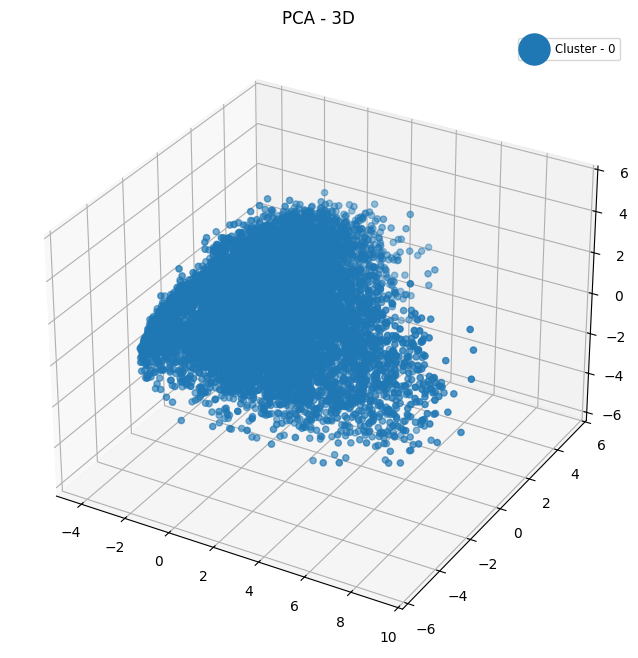

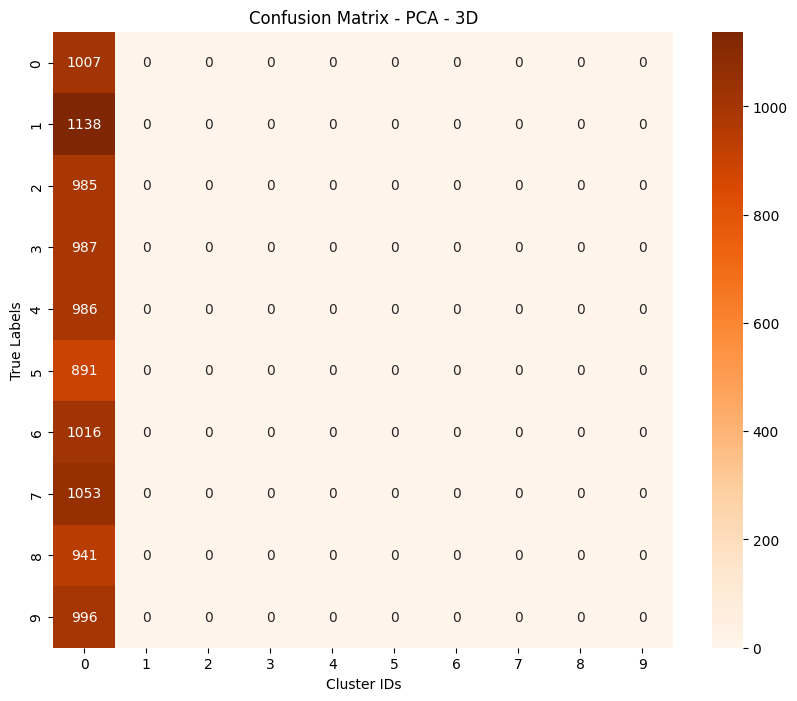

PCA for Dimension = 5
Purity for PCA 5D: 0.1138


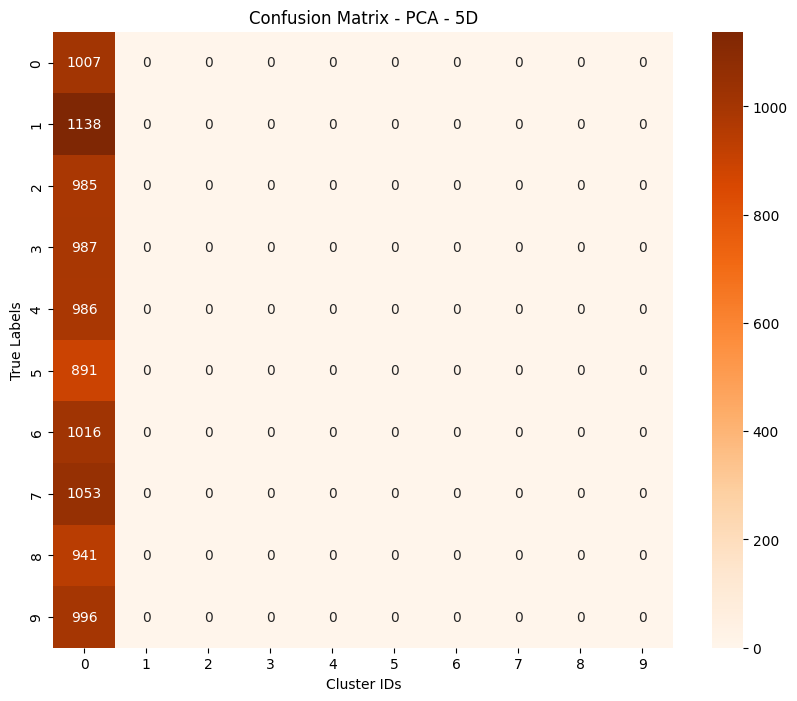

In [17]:
for dim in [2, 3, 5]:
    print(f"PCA for Dimension = {dim}")
    pca = PCA(n_components=dim, random_state=97).fit_transform(mnist_images)
    labels = apply_dbscan(pca, mnist_labels, f"PCA {dim}D")
    if dim in [2, 3]:
        plot_dbscan(pca, labels, f"PCA - {dim}D")
    plot_confusion_matrix(mnist_labels, labels, f"PCA - {dim}D")

Purity for TSNE 2D: 0.1502


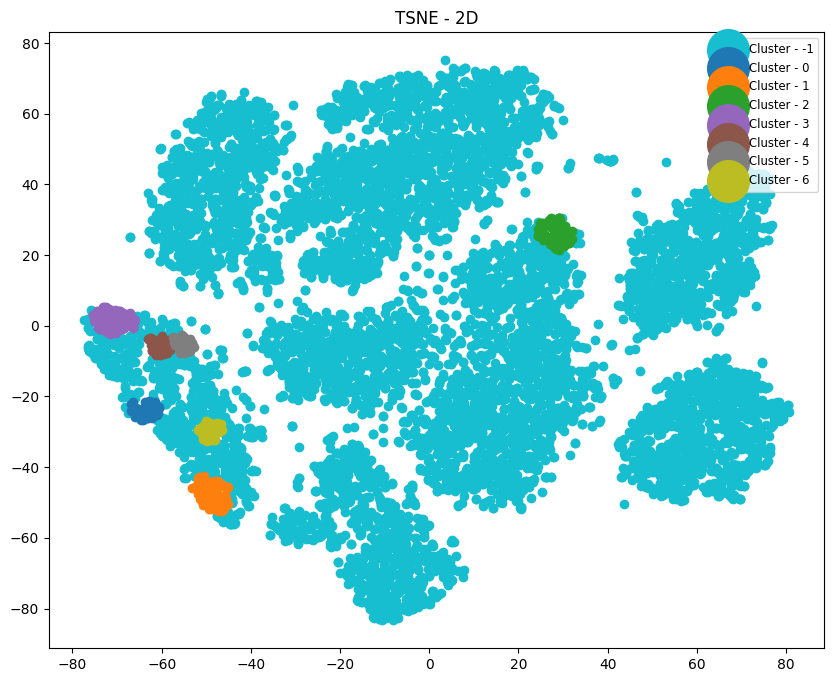

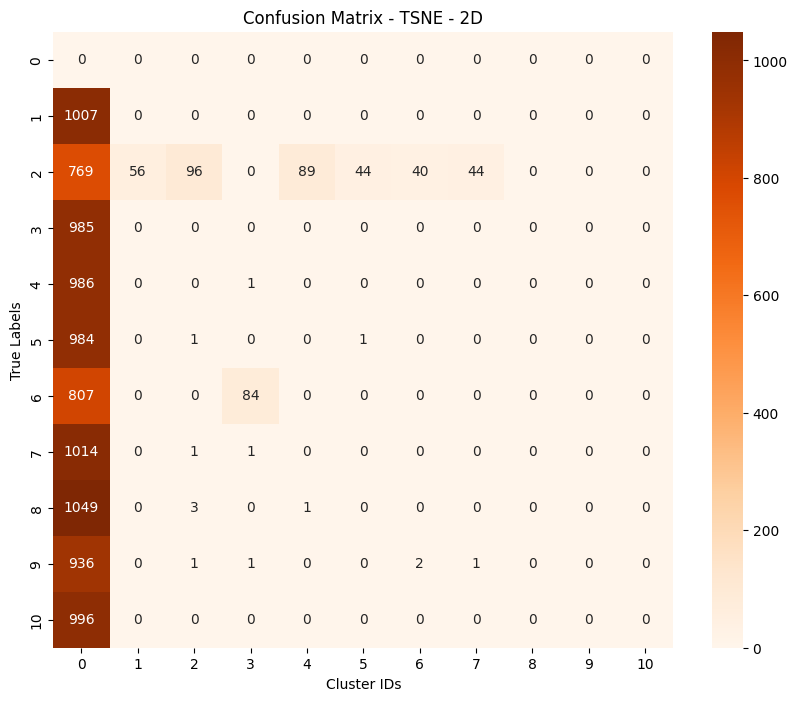

Purity for TSNE 3D: 0.7333


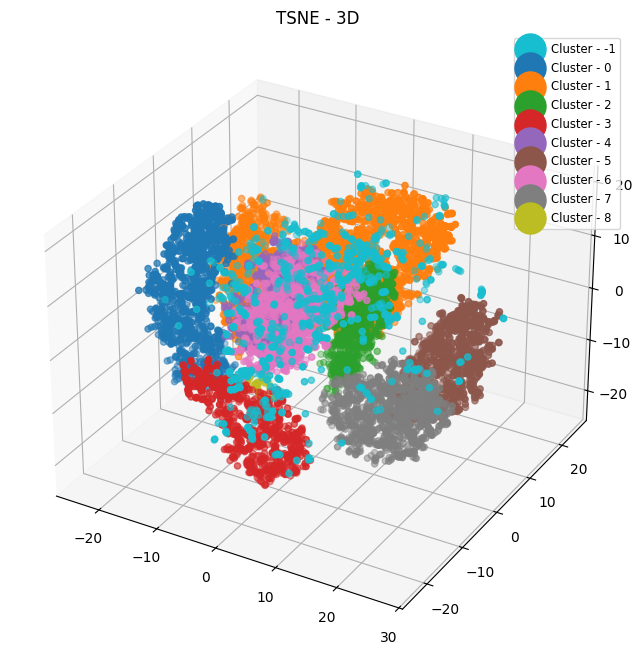

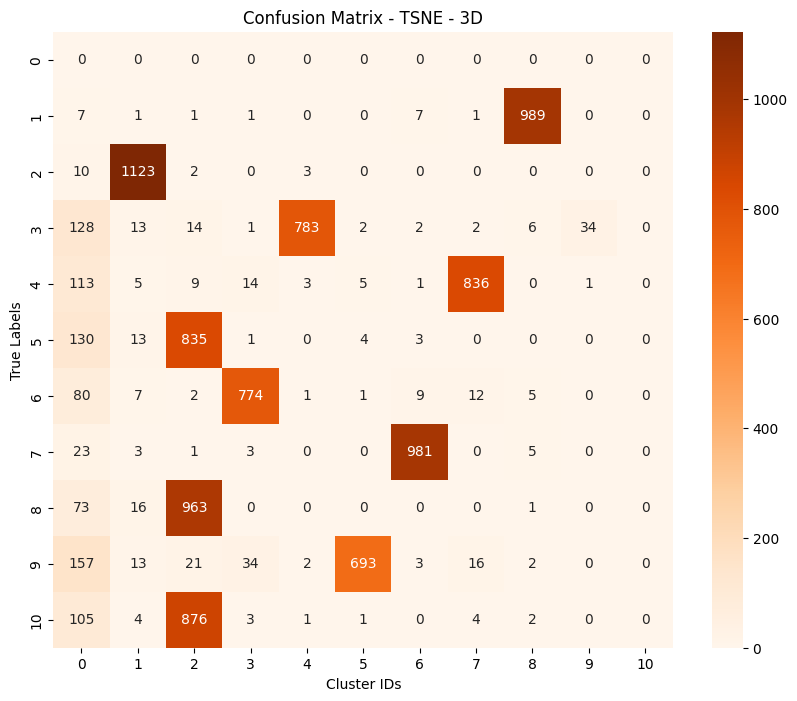

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

In [18]:
for dim in [2, 3, 5]:
    tsne = TSNE(n_components=dim, random_state=97).fit_transform(mnist_images)
    labels = apply_dbscan(tsne, mnist_labels, f"TSNE {dim}D")
    if dim in [2, 3]:
        plot_dbscan(tsne, labels, f"TSNE - {dim}D")
    plot_confusion_matrix(mnist_labels, labels, f"TSNE - {dim}D")

# Part B Attempt 2

In [20]:
path_to_data = os.environ.get("MNIST_DATAPATH")
mnist_files = os.listdir(path_to_data)
mnist_files = [x for x in mnist_files if x.endswith("ubyte")]


def convert_to_int(byte):
    integer = int(codecs.encode(byte, 'hex'), 16)
    return integer


dataset = {}
for file in mnist_files:
    print("Reading", file)
    with open(path_to_data + file, "rb") as f:
        data = f.read()
        type_of_data = convert_to_int(data[:4])
        length = convert_to_int(data[4:8])
        if type_of_data == 2051:
            category = "images"
            number_of_rows = convert_to_int(data[8:12])
            number_of_columns = convert_to_int(data[12:16])
            parsed = np.frombuffer(data, dtype=np.uint8, offset=16)
            parsed = parsed.reshape(length, number_of_rows, number_of_columns)
        if type_of_data == 2049:
            category = "labels"
            parsed = np.frombuffer(data, dtype=np.uint8, offset=8)
            parsed = parsed.reshape(length)
        if length == 60000:
            set = "train"
        if length == 10000:
            set = "test"
        dataset[set + '_' + category] = parsed

print(dataset["train_images"][0, :, :])

train_images = dataset['train_images']
train_labels = dataset['train_labels']
train_images_flattened = train_images.reshape(60000, -1)
train_images_flattened = train_images_flattened / 255

test_images = dataset['train_images']
test_images = dataset['train_labels']
test_images_flattened = test_images.reshape(10000, -1)
test_images_flattened = test_images_flattened / 255

indexes = np.random.choice(60000, size=5000, replace=False)
train_images = train_images_flattened[indexes]
train_labels = train_labels[indexes]

Reading t10k-images-idx3-ubyte
Reading t10k-labels-idx1-ubyte
Reading train-images-idx3-ubyte
Reading train-labels-idx1-ubyte
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 2

In [21]:
X = train_images
y = train_labels

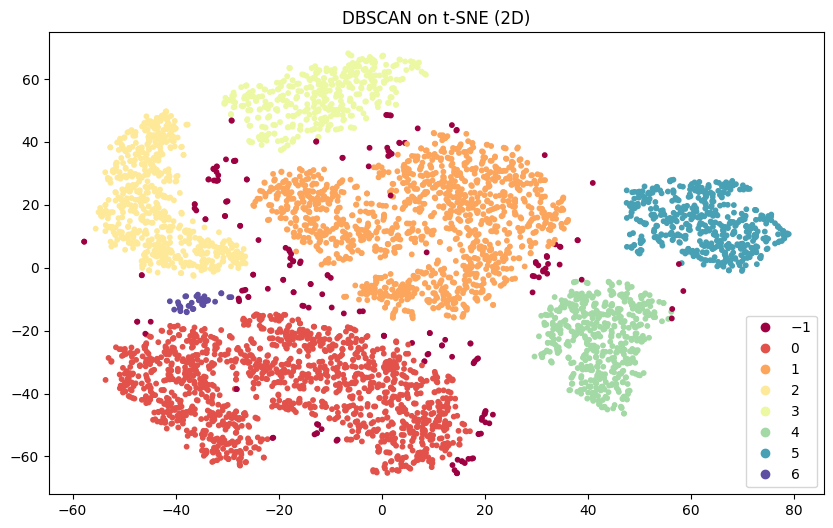

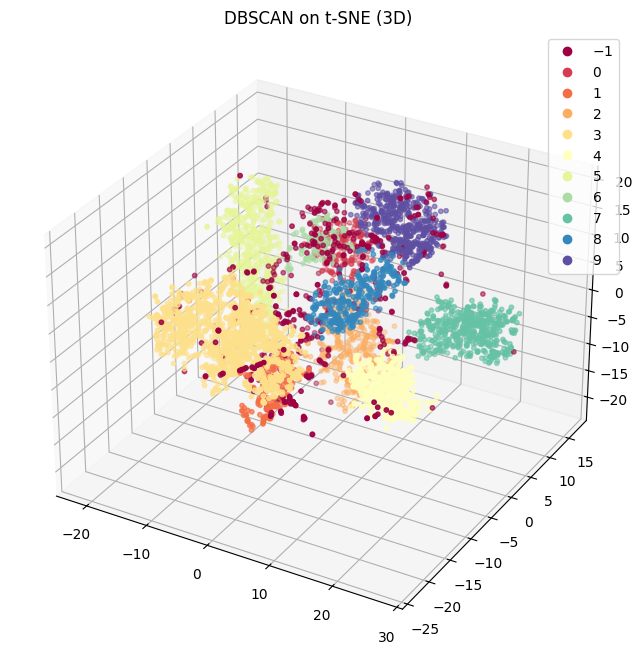

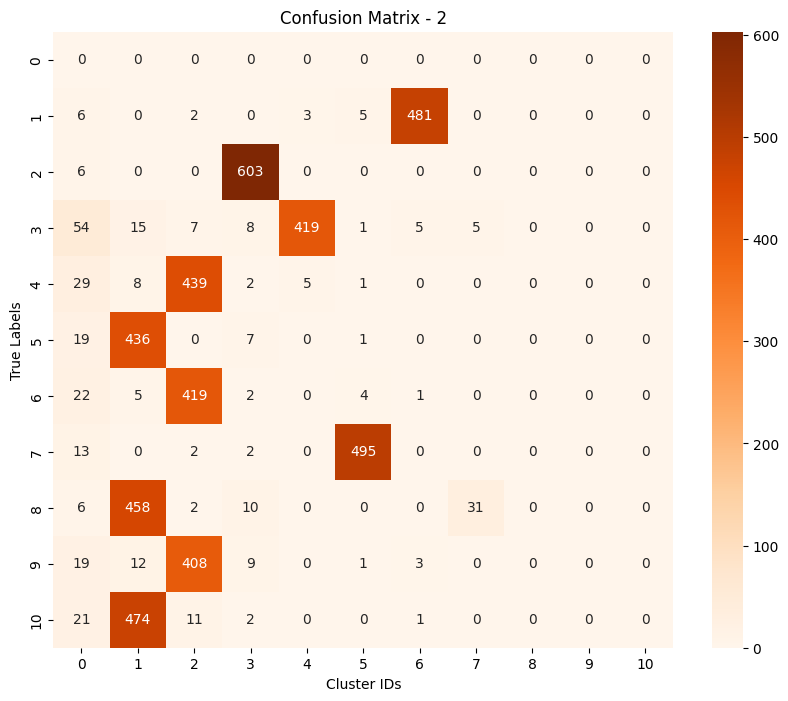

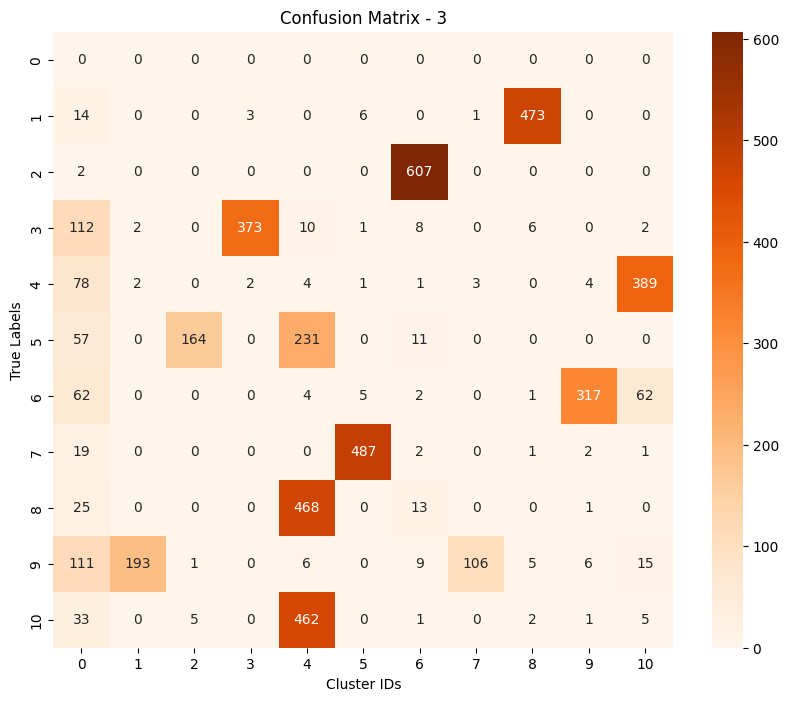

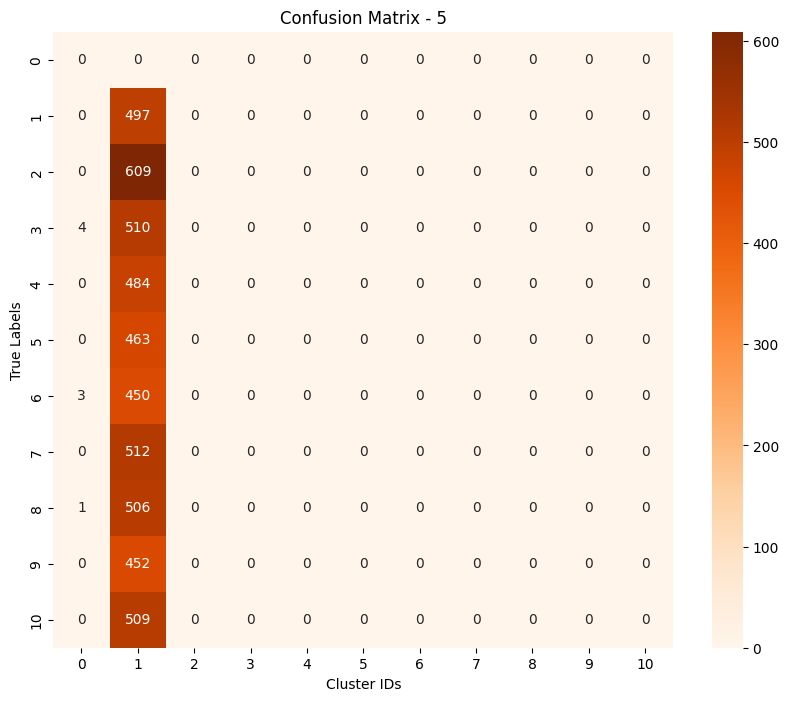

Purity Score (2D): 0.5992
Purity Score (3D): 0.7378
Purity Score (5D): 0.1226


In [33]:
# Reduce dimensions with t-SNE for 2, 3, and 5 dimensions
tsne_2d = TSNE(n_components=2).fit_transform(X)
tsne_3d = TSNE(n_components=3).fit_transform(X)
tsne_5d = TSNE(n_components=5, method="exact").fit_transform(X)

# Apply DBSCAN on t-SNE reduced data
dbscan_2d = DBSCAN(eps=3.5, min_samples=16).fit(tsne_2d)
dbscan_3d = DBSCAN(eps=3.2, min_samples=42).fit(tsne_3d)
dbscan_5d = DBSCAN(eps=3.5, min_samples=30).fit(tsne_5d)

# Visualize 2D DBSCAN
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_2d[:, 0], tsne_2d[:, 1], c=dbscan_2d.labels_, cmap='Spectral', s=10)
plt.title("DBSCAN on t-SNE (2D)")
handles, labels = scatter.legend_elements()
plt.legend(handles, labels)
plt.show()

# Visualize 3D DBSCAN
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_3d[:, 0], tsne_3d[:, 1], tsne_3d[:, 2], c=dbscan_3d.labels_, cmap='Spectral', s=10)
plt.title("DBSCAN on t-SNE (3D)")
handles, labels = scatter.legend_elements()
plt.legend(handles, labels)
plt.show()

# Confusion matrix for evaluating DBSCAN clustering accuracy
def purity_score(true_labels, predicted_labels, d):
    confusion = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges')
    plt.xlabel("Cluster IDs")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {d}")
    plt.show()
    return np.sum(np.amax(confusion, axis=0)) / np.sum(confusion)

purity_2d = purity_score(y, dbscan_2d.labels_, 2)
purity_3d = purity_score(y, dbscan_3d.labels_, 3)
purity_5d = purity_score(y, dbscan_5d.labels_, 5)

print(f"Purity Score (2D): {purity_2d}")
print(f"Purity Score (3D): {purity_3d}")
print(f"Purity Score (5D): {purity_5d}")

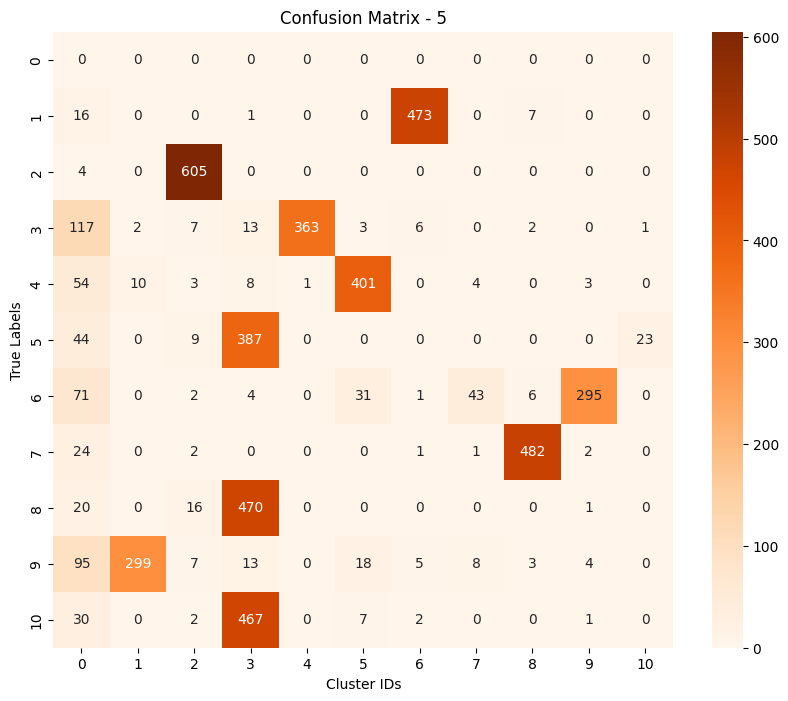

Purity Score (5D): 0.7142


In [39]:
dbscan_5d = DBSCAN(eps=2.9, min_samples=46).fit(tsne_5d)
purity_5d = purity_score(y, dbscan_5d.labels_, 5)
print(f"Purity Score (5D): {purity_5d}")

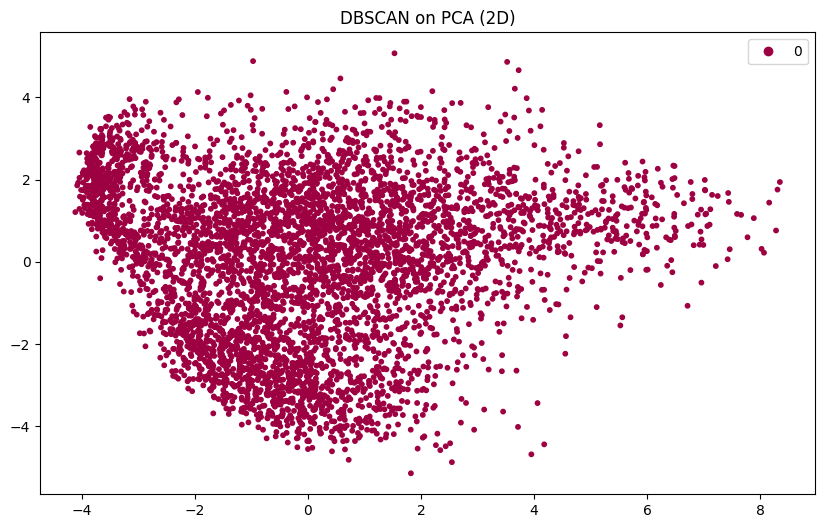

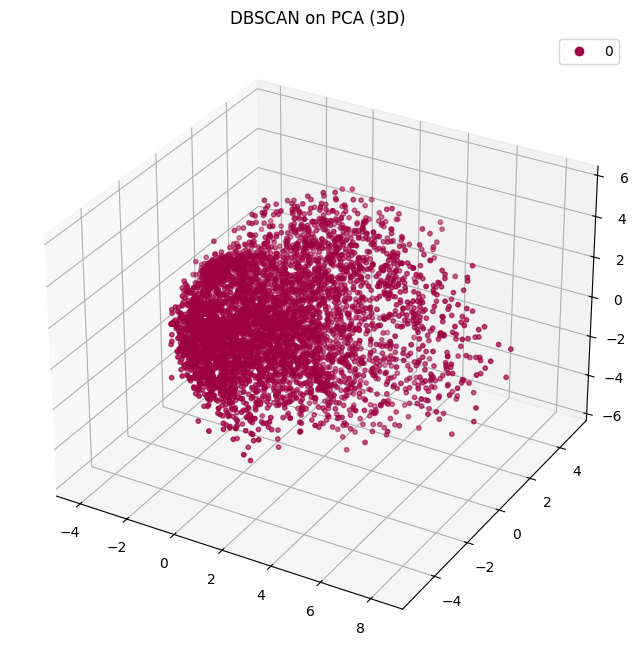

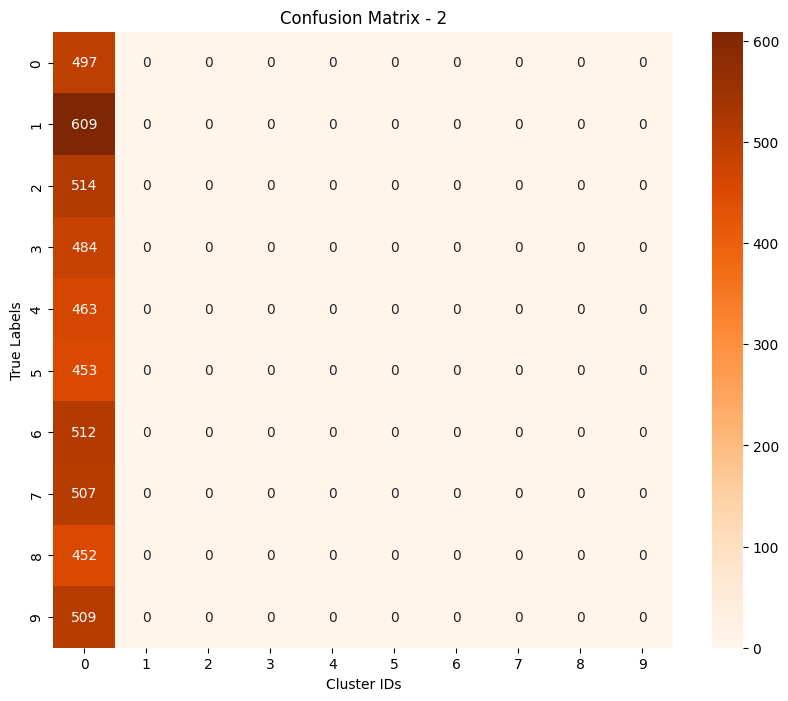

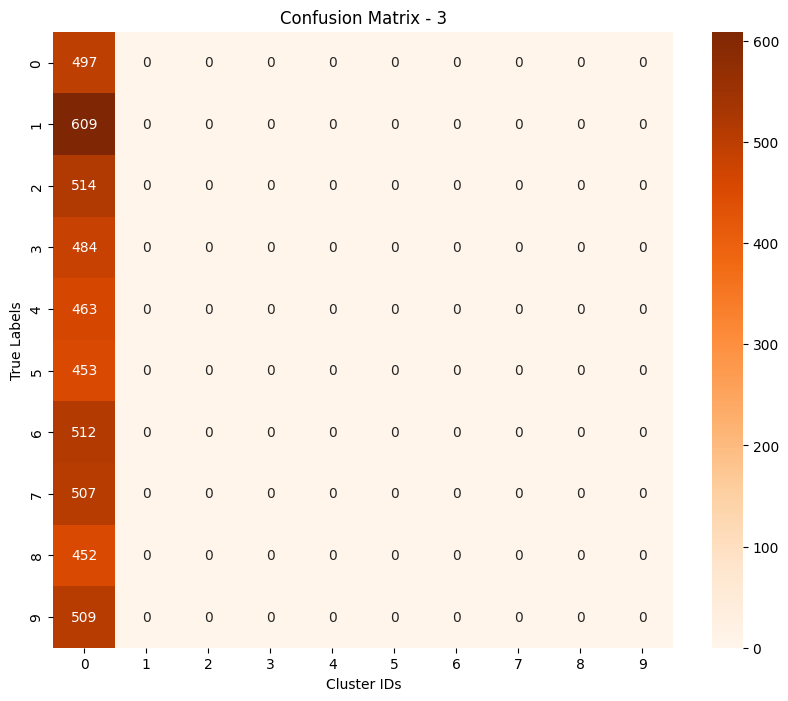

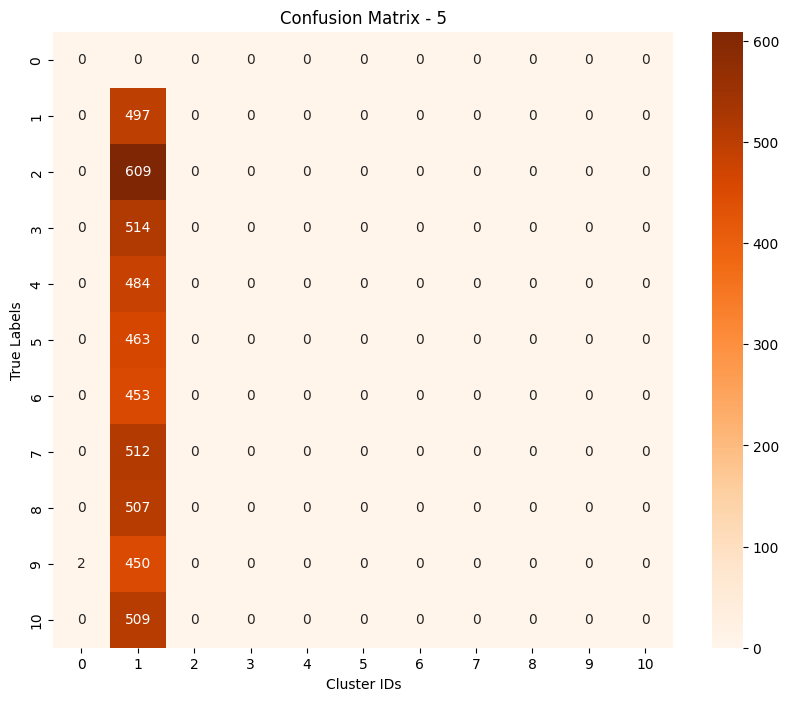

In [40]:
pca_2 = PCA(n_components=2).fit_transform(X)
pca_3 = PCA(n_components=3).fit_transform(X)
pca_5 = PCA(n_components=5).fit_transform(X)

dbscan_pca_2 = DBSCAN(eps=3.5, min_samples=16).fit(pca_2)
dbscan_pca_3 = DBSCAN(eps=3.2, min_samples=42).fit(pca_3)
dbscan_pca_5 = DBSCAN(eps=2.9, min_samples=46).fit(pca_5)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_2[:, 0], pca_2[:, 1], c=dbscan_pca_2.labels_, cmap='Spectral', s=10)
plt.title("DBSCAN on PCA (2D)")
handles, labels = scatter.legend_elements()
plt.legend(handles, labels)
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], c=dbscan_pca_3.labels_, cmap='Spectral', s=10)
plt.title("DBSCAN on PCA (3D)")
handles, labels = scatter.legend_elements()
plt.legend(handles, labels)
plt.show()

purity_pca_2 = purity_score(y, dbscan_pca_2.labels_, 2)
purity_pca_3 = purity_score(y, dbscan_pca_3.labels_, 3)
purity_pca_5 = purity_score(y, dbscan_pca_5.labels_, 5)



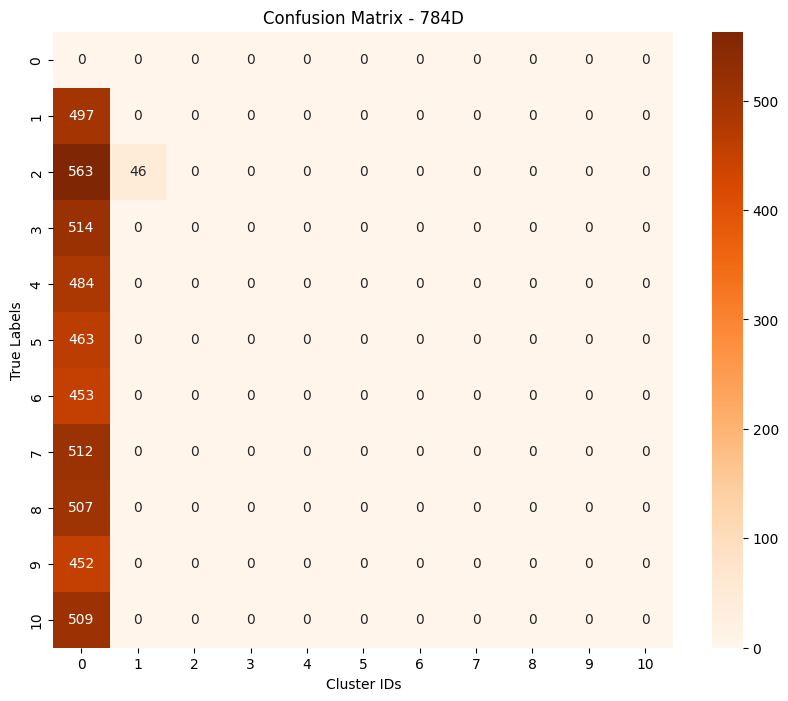

Purity for 784D data: 0.1218


In [41]:
normal_784 = DBSCAN(eps=3, min_samples=45).fit(X)
purity_normal_784 = purity_score(y, normal_784.labels_, "784D")
print(f"Purity for 784D data: {purity_normal_784:.4f}")